###  Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
import os

### Importing data

In [2]:
relative_path = os.path.join('..', 'cleaned_starting_file', 'mission_launches_df_cleaned.csv')

# Construct the absolute path
absolute_path = os.path.abspath(relative_path)

# Read the CSV file into a DataFrame
df = pd.read_csv(absolute_path)

### Viewing DataFrame

In [3]:
df

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,Status: Active,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,Status: Active,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,Status: Active,No Info,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,Status: Active,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,Status: Active,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00,Vanguard | Vanguard TV3BU,Status: Retired,No Info,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00,Juno I | Explorer 1,Status: Retired,No Info,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00,Vanguard | Vanguard TV3,Status: Retired,No Info,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00,Sputnik 8K71PS | Sputnik-2,Status: Retired,No Info,Success


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Graphs

#### Checking how many different Organisation values DataFrame has

In [4]:
df.Organization.value_counts()

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


#### Checking how many unique values Organization column has

In [5]:
print("There are {} different values in the 'Organization' column.".format(df['Organization'].nunique()))

There are 56 different values in the 'Organization' column.


### Bar chart for number of launches by Organization based on Organization column

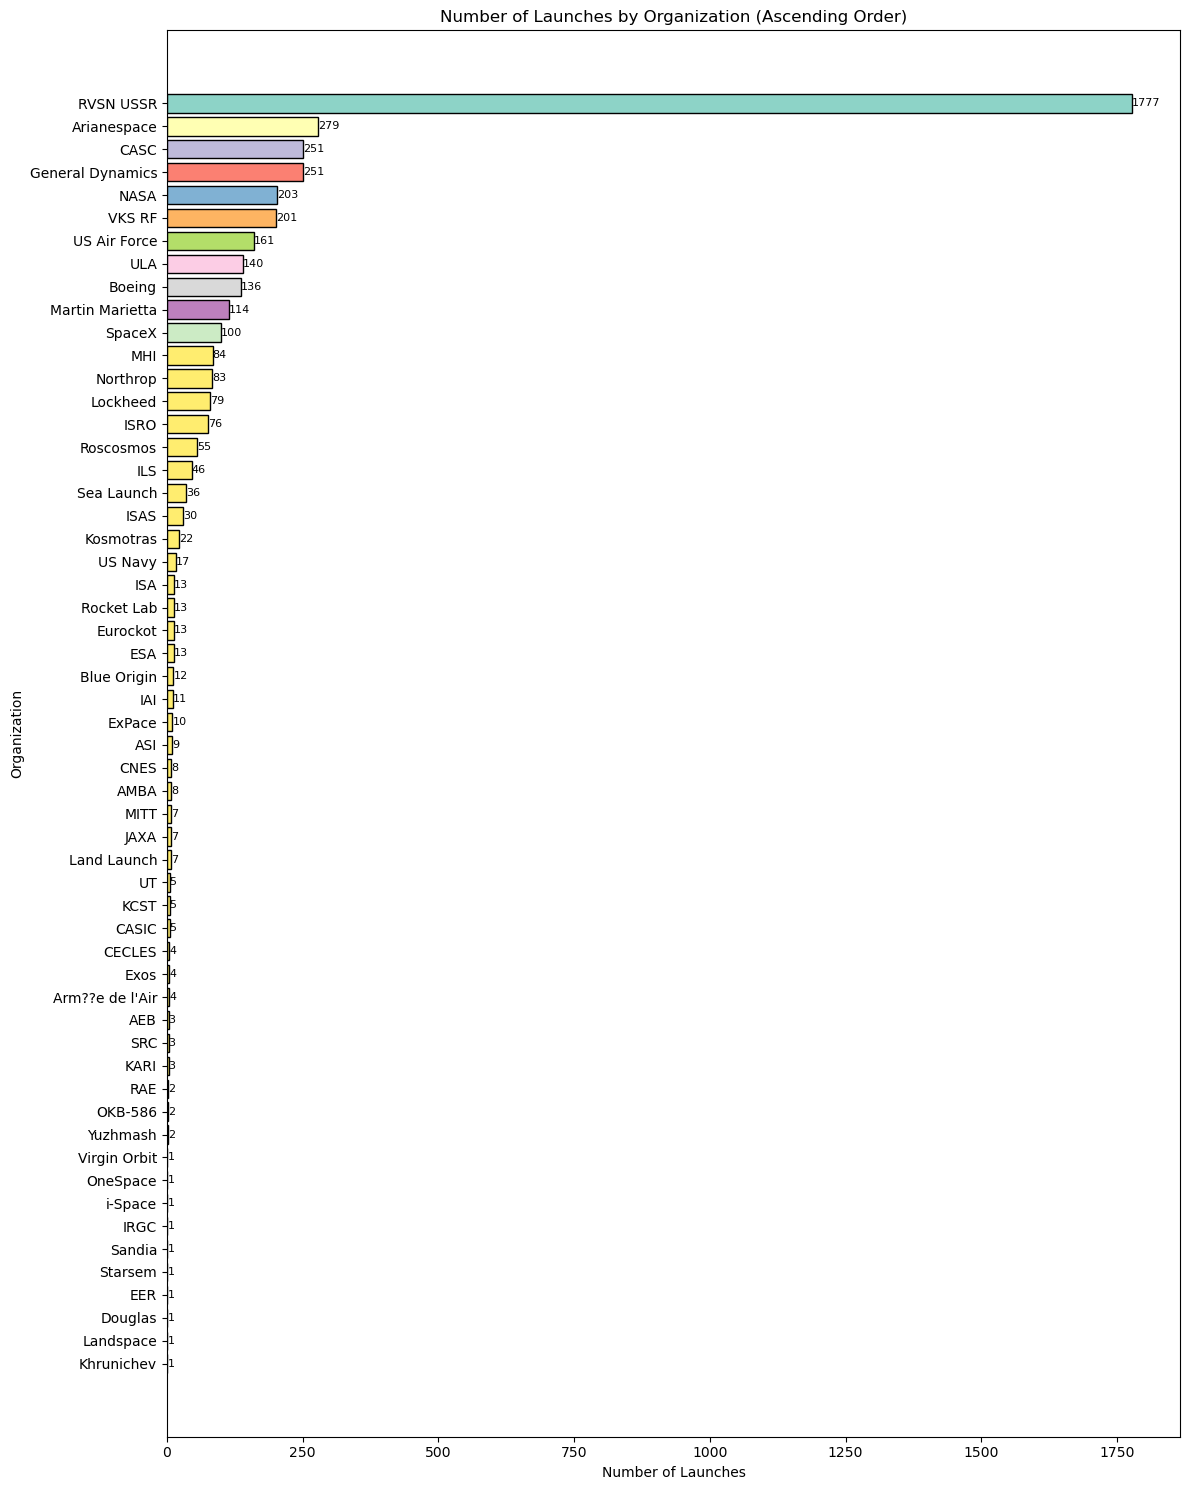

In [6]:
organization_counts = df['Organization'].value_counts()

# Sort organizations by the number of launches in ascending order
organization_counts = organization_counts.sort_values(ascending=True)

plt.figure(figsize=(12, 15))
bars = plt.barh(organization_counts.index, organization_counts, color=plt.cm.Set3(range(len(organization_counts)))[::-1], height=0.8, edgecolor='black')

plt.title('Number of Launches by Organization (Ascending Order)')
plt.xlabel('Number of Launches')
plt.ylabel('Organization')

# Annotate each bar with its value
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=8, color='black')

plt.tight_layout()
plt.show()

#### Checking how many unique values Location column has

In [7]:
print("There are {} different values in the 'Location' column.".format(df['Location'].nunique()))

There are 137 different values in the 'Location' column.


#### Bar chart for top 10 locations based on Location column

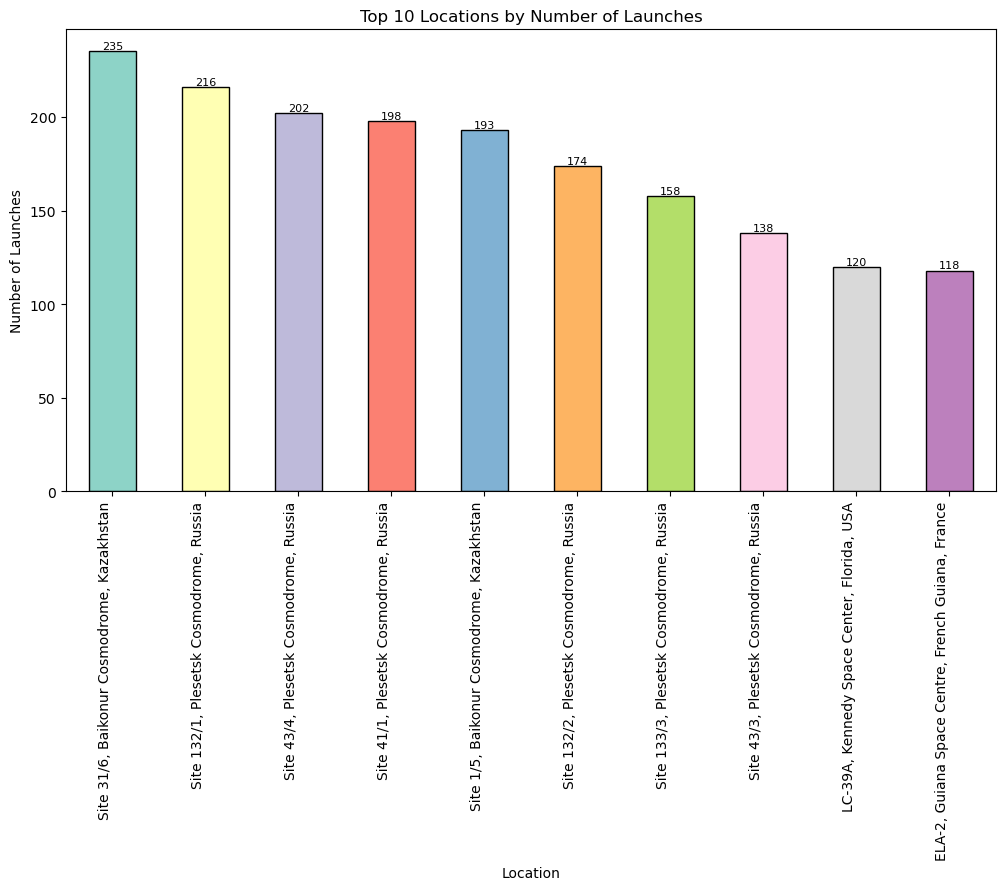

In [8]:
top_locations = df['Location'].value_counts().head(10)

plt.figure(figsize=(12, 6))
colors = plt.cm.Set3(range(len(top_locations)))
bars = top_locations.plot(kind='bar', color=colors, edgecolor='black')

plt.title('Top 10 Locations by Number of Launches')
plt.xlabel('Location')
plt.ylabel('Number of Launches')
plt.xticks(rotation=90, ha='right')

# Annotate each bar with its value
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', 
             va='bottom', ha='center', fontsize=8, color='black')

plt.show()

### Checking how many different countries Location column has to see where space mission launches have taken place

#### Extracting country name from Location column

In [9]:
df['Country'] = df['Location'].str.split(', ').str[-1]

#### Counting different countries

In [10]:
country_counts = df['Country'].value_counts()
print(country_counts)

Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
New Zealand                         13
Iran                                13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
South Korea                          3
Barents Sea                          3
Brazil                               3
Gran Canaria                         2
Pacific Missile Range Facility       1
Yellow Sea                           1
Shahrud Missile Test Site            1
Name: Country, dtype: int64


#### Checking how many unique values extracted Country column has

In [11]:
print("There are {} different values in the extracted 'Country' column.".format(df['Country'].nunique()))

There are 22 different values in the extracted 'Country' column.


#### Bar chart for number of launches per country based on Location column

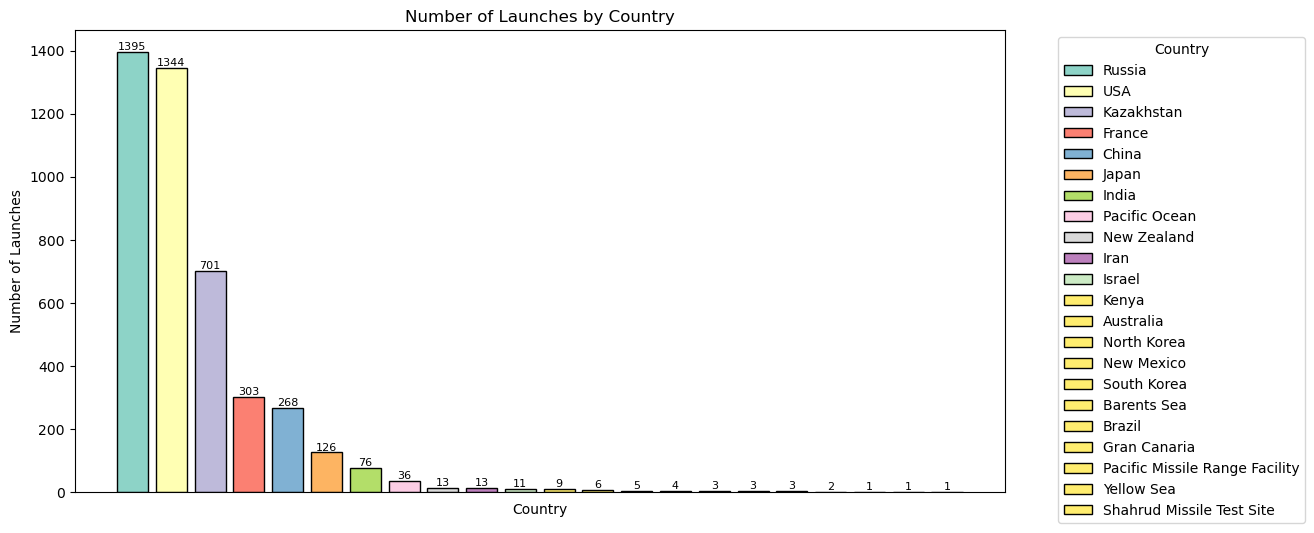

In [22]:
country_counts = df['Country'].value_counts()

plt.figure(figsize=(12, 6))
colors = plt.cm.Set3(range(len(country_counts)))
bars = []

for country, count, color in zip(country_counts.index, country_counts, colors):
    bar = plt.bar(country, count, color=color, edgecolor='black')
    bars.append(bar[0])

plt.title('Number of Launches by Country')
plt.xlabel('Country')
plt.ylabel('Number of Launches')
plt.xticks([])  # Remove x-axis ticks

# Annotate each bar with its value
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', 
             va='bottom', ha='center', fontsize=8, color='black')

# Create a legend with country names
plt.legend(bars, country_counts.index, title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### Line chart for space mission launches over years based on Date column

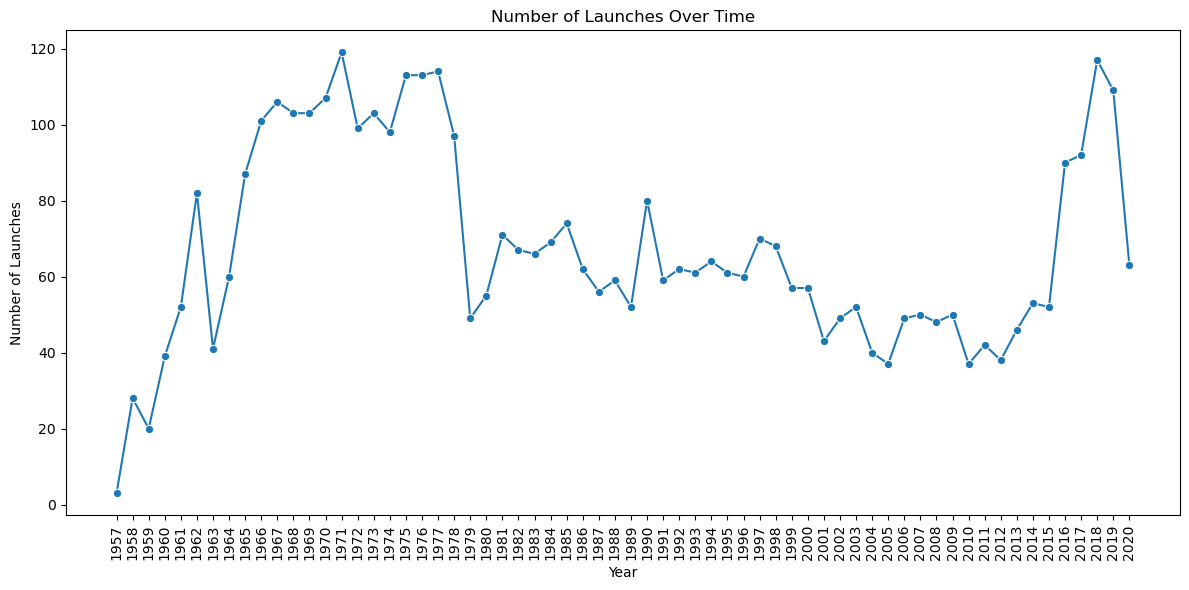

In [13]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from the 'Date' column
df['YearMonth'] = df['Date'].dt.to_period('M')

# Count the number of launches per month
launches_over_time = df['YearMonth'].value_counts().sort_index().reset_index()
launches_over_time.columns = ['YearMonth', 'Count']

# Downsampling to yearly frequency
launches_over_time_resampled = launches_over_time.set_index('YearMonth').resample('Y').sum().reset_index()

# Convert Period to string and extract only the year for plotting
launches_over_time_resampled['Year'] = launches_over_time_resampled['YearMonth'].dt.year

# Create a Seaborn lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Count', data=launches_over_time_resampled, marker='o')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches Over Time')

# Display the plot with ticks for every year
plt.xticks(launches_over_time_resampled['Year'], rotation=90)
plt.tight_layout()
plt.show()

#### Pie chart based on Rocket_Status column

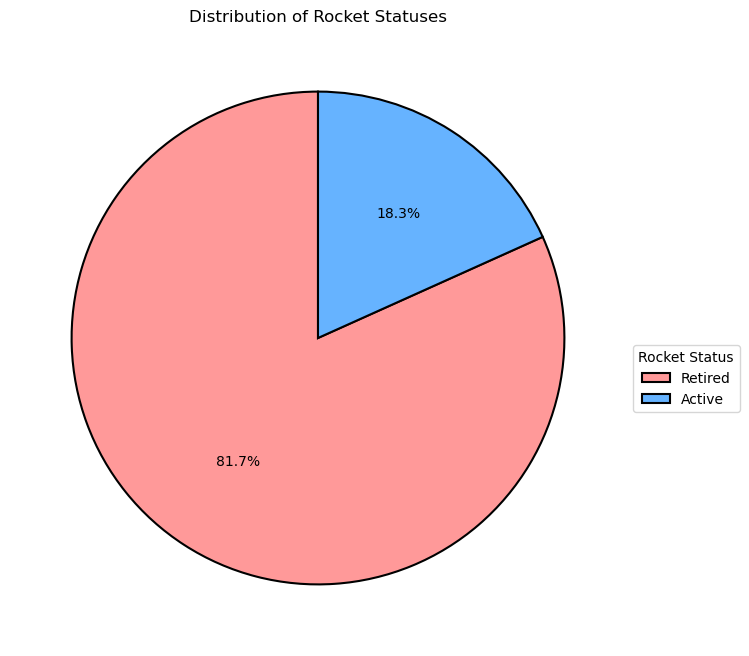

In [14]:
# Extract the rocket status without the 'Status: ' prefix
df['Rocket_Status'] = df['Rocket_Status'].str.replace('Status: ', '')

# Count the occurrences of each rocket status
rocket_status_counts = df['Rocket_Status'].value_counts()

# Define colors based on rocket status
colors = {'Active': '#66b3ff', 'Retired': '#ff9999'}

# Plotting a pie chart with colored wedges, black outline, percentages, and legend
plt.figure(figsize=(8, 8))
plt.pie(rocket_status_counts, labels=None, autopct='%1.1f%%', startangle=90, colors=[colors[status] for status in rocket_status_counts.index], wedgeprops=dict(edgecolor='black', linewidth=1.5))
plt.title('Distribution of Rocket Statuses')
plt.legend(rocket_status_counts.index, title='Rocket Status', loc='best', bbox_to_anchor=(1, 0.5))
plt.show()

#### Line chart for available prices over years based on Price and Date columns

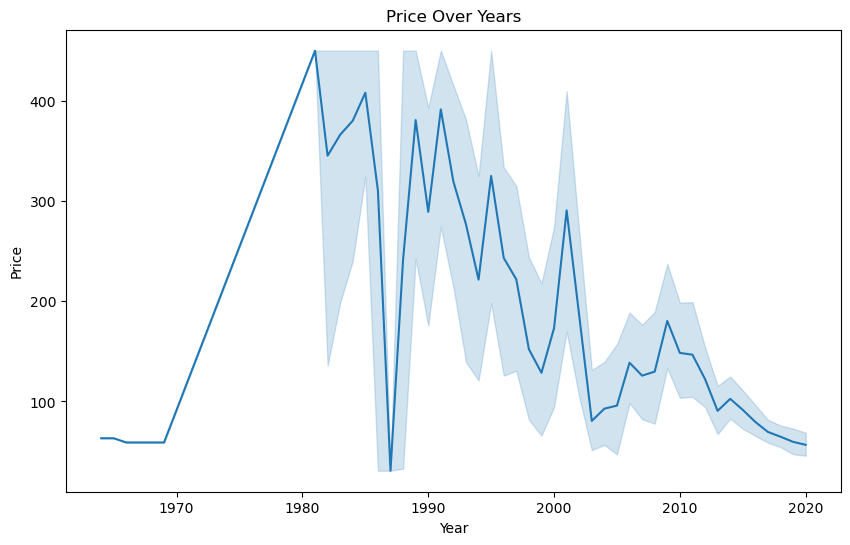

In [15]:
# Convert the "Date" column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the "Date" column and create a new column "Year"
df['Year'] = df['Date'].dt.year

# Create a new variable to hold the filtered DataFrame
df_filtered = df.loc[df['Price'] != 'No Info'].copy()

# Convert the "Price" column to numeric (assuming it's a numeric column)
df_filtered['Price'] = pd.to_numeric(df_filtered['Price'])

# Create a Seaborn lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Price', data=df_filtered)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price Over Years')

# Show the plot or save it to a file (modify the file path accordingly)
plt.savefig('price_over_years.png')

# Show the plot
plt.show()

### Histogram for launches per month based on Date column

#### Checking number of launches per month

In [16]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month from the 'Date' column
df['Month'] = df['Date'].dt.month_name()

# Count the number of launches per month
launches_per_month = df['Month'].value_counts().sort_index()

# Get the total number of launches
total_launches = len(df)

# Print launches per month
print("Launches per month:")
print(launches_per_month)

# Print total number of launches
print(f"\nTotal Launches: {total_launches}")

Launches per month:
April        383
August       373
December     450
February     336
January      268
July         351
June         402
March        353
May          326
November     336
October      381
September    365
Name: Month, dtype: int64

Total Launches: 4324


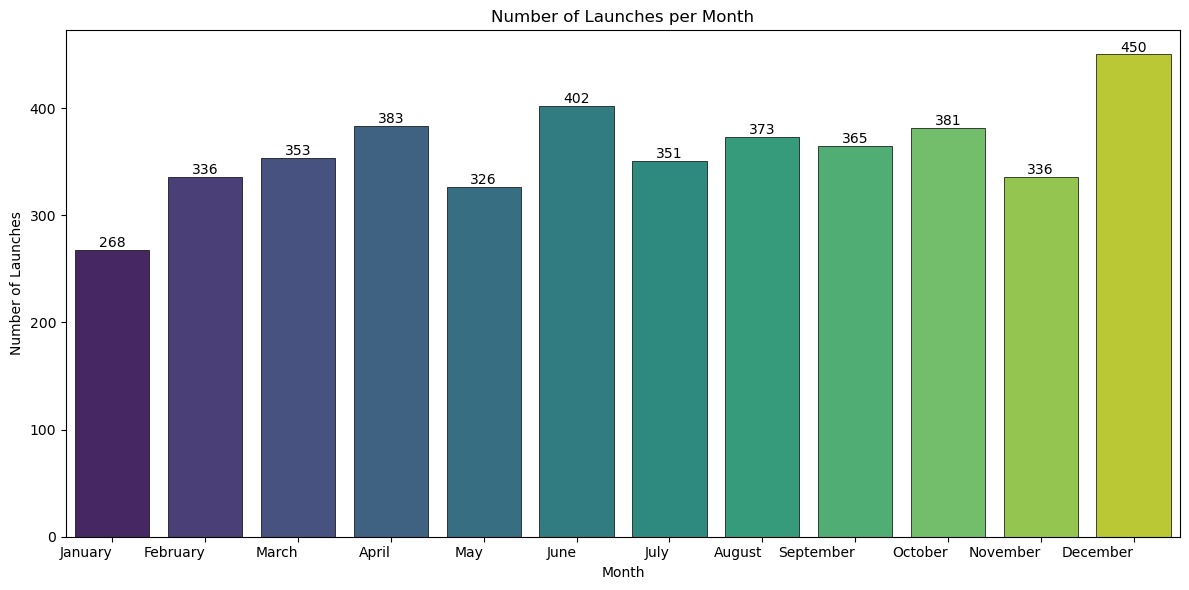

In [17]:
# Convert 'Date' to datetime format and extract month
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a Seaborn bar plot with different colors for each month
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Month', data=df, order=month_order, palette='viridis', edgecolor='black', linewidth=0.5)

# Add number labels over each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.title('Number of Launches per Month')

# Display the plot
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

#### Bar chart for spending per Organization based on Price and Organization columns

#### Checking how many Organizations have values in Price column

In [18]:
# Count organizations with 'No Info' in the 'Price' column
no_info_price_count = df[df['Price'] == 'No Info']['Organization'].nunique()

# Count organizations with actual values in the 'Price' column
other_price_count = df[df['Price'] != 'No Info']['Organization'].nunique()

# List organizations with 'No Info' in the 'Price' column
no_info_price_org_list = df.loc[df['Price'] == 'No Info', 'Organization'].unique()

# List organizations with actual values in the 'Price' column
other_price_org_list = df.loc[df['Price'] != 'No Info', 'Organization'].unique()

print(f"Number of organizations with 'No Info' in the 'Price' column: {no_info_price_count}")
print(f"Number of organizations with actual values in  in the 'Price' column: {other_price_count}")
print(f"Organizations with 'No Info' in the 'Price' column: {', '.join(no_info_price_org_list)}")
print(f"Organizations with actual values in  in the 'Price' column: {', '.join(other_price_org_list)}")

Number of organizations with 'No Info' in the 'Price' column: 49
Number of organizations with actual values in  in the 'Price' column: 24
Organizations with 'No Info' in the 'Price' column: SpaceX, CASC, IAI, VKS RF, ExPace, IRGC, ISA, ULA, Arianespace, Blue Origin, Exos, Roscosmos, i-Space, OneSpace, ISRO, Landspace, JAXA, Land Launch, MHI, CASIC, KCST, Khrunichev, Sea Launch, KARI, Boeing, ISAS, SRC, MITT, Lockheed, ILS, AEB, Starsem, ESA, RVSN USSR, General Dynamics, Martin Marietta, Yuzhmash, Douglas, ASI, US Air Force, CNES, NASA, CECLES, RAE, UT, OKB-586, AMBA, Arm??e de l'Air, US Navy
Organizations with actual values in  in the 'Price' column: SpaceX, CASC, Roscosmos, ULA, JAXA, Northrop, ExPace, Rocket Lab, Virgin Orbit, MHI, Arianespace, VKS RF, ISRO, ILS, Eurockot, Sandia, Kosmotras, ESA, NASA, Boeing, Lockheed, EER, Martin Marietta, US Air Force


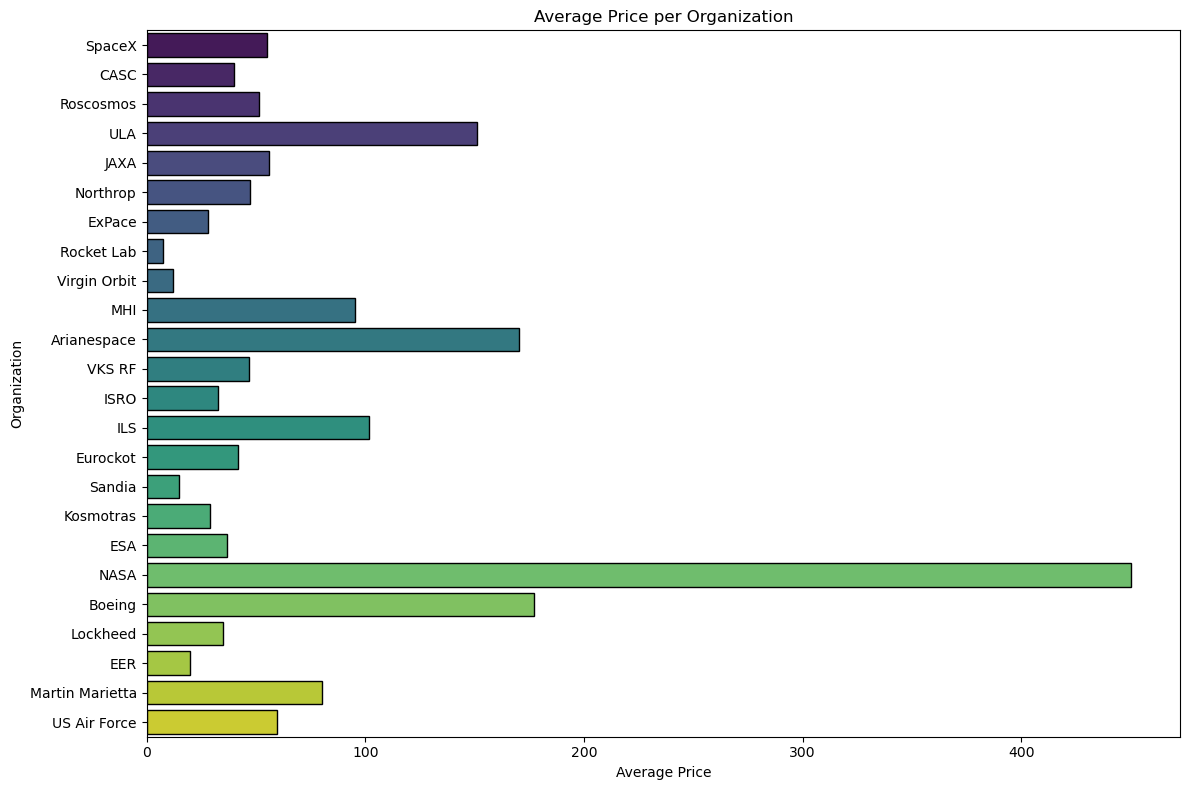

In [19]:
# Filter out rows with 'No Info' in the 'Price' column
df_filtered = df[df['Price'] != 'No Info'].copy()

# Convert 'Price' column to numeric
df_filtered['Price'] = pd.to_numeric(df_filtered['Price'])

# Create a horizontal bar chart for average price per organization
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Price', y='Organization', data=df_filtered, errorbar=None, palette='viridis', edgecolor='black')

# Set plot labels and title
plt.xlabel('Average Price')
plt.ylabel('Organization')
plt.title('Average Price per Organization')

# Display the plot
plt.tight_layout()
plt.show()